# Assessment for Computer Infrastructure

## Problem 1: 
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks.

According to the [documentation](https://pypi.org/project/yfinance/), yfinance "offers a Pythonic way to fetch financial & market data from Yahoo!Ⓡ finance"

In [10]:
# import
import yfinance as yf


In order to create a file name with a date or time, we need the [datetime](https://www.geeksforgeeks.org/python/how-to-create-filename-containing-date-or-time-in-python/) module. 

In [11]:
# import datetime
from datetime import datetime 

This code is a quick check on the method of getting the datetime in the right format. Leave it commented out unless you want to carry out the check. 

In [3]:
#current_datetime = datetime.now().strftime("%Y%m%d-%H%M%S")
#print(current_datetime)

Next, build a function that downloads all hourly data for the previous five days for the five FAANG stocks: Meta, Apple, Amazon, Netflix, and Google.The function will save the data into a folder called data in the root of my repository using a filename with the format YYYYMMDD-HHmmss.csv

In [12]:
# create a function as per https://www.geeksforgeeks.org/python/python-functions/ 
def get_data():

    # Access multiple tickers as per documentation (https://ranaroussi.github.io/yfinance/reference/index.html).
    # adapted code on importing historical data from here: https://rowzero.io/blog/yfinance 
    # specific valid intervals found here: https://medium.com/@anjalivemuri97/day-4-fetching-historical-stock-data-with-yfinance-f45f3bd8b9c6 
    data = yf.download("META AAPL AMZN NFLX GOOG", period="5d", group_by= 'Ticker', interval='1h')

    # flatten the multi-level columns so the csv is very easy to read for analysis (see old files for errors). 
    # Adapted from: https://stackoverflow.com/questions/63107594/how-to-deal-with-multi-level-column-names-downloaded-with-yfinance/63107801#63107801
    data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

    #create the time stamp that can dynamically name the file (tested above).
    current_datetime = datetime.now().strftime("%Y%m%d-%H%M%S")

    # convert the output into a string so we can use it in a file name.
    current_datetime_str = str(current_datetime)

    # name the file with .csv extension so it saves as a csv file.
    file_name = current_datetime_str + ".csv"

    file_path = "data/"

    # save df to a csv: https://www.geeksforgeeks.org/pandas/saving-a-pandas-dataframe-as-a-csv/ 
    data.to_csv(file_path + file_name)

    # return the DataFrame for further use
    return data
    

In [13]:
# save the result of the function to data so i can check it. 
data = get_data()
# check it returns something (i.e doesn't say None)
print(data)

/tmp/ipykernel_1817/3351765510.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("META AAPL AMZN NFLX GOOG", period="5d", group_by= 'Ticker', interval='1h')
[*********************100%***********************]  5 of 5 completed
/tmp/ipykernel_1817/3351765510.py:11: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)


Price                     Ticker         Open         High          Low  \
Date                                                                      
2025-10-30 13:30:00+00:00   AAPL   271.989990   274.140015   268.989990   
2025-10-30 13:30:00+00:00   AMZN   226.872498   228.000000   223.949997   
2025-10-30 13:30:00+00:00   GOOG   291.869995   291.899994   280.450012   
2025-10-30 13:30:00+00:00   META   668.750000   672.000000   650.169983   
2025-10-30 13:30:00+00:00   NFLX  1094.500000  1106.130005  1089.359985   
...                          ...          ...          ...          ...   
2025-11-05 19:30:00+00:00   AAPL   270.410004   271.500000   269.589996   
2025-11-05 19:30:00+00:00   AMZN   249.110001   249.524994   248.779999   
2025-11-05 19:30:00+00:00   GOOG   284.390015   284.459991   283.459991   
2025-11-05 19:30:00+00:00   META   638.000000   640.539978   637.840027   
2025-11-05 19:30:00+00:00   NFLX  1093.155029  1094.790039  1091.318970   

Price                   

## Problem 2: Plotting Data

Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

We need to import the os library for this next step. The os library allos you to interact with operating system, and the [os.path.getctime](https://www.geeksforgeeks.org/python/python-os-path-getctime-method/) will find the creation time (ctime) of the specificed file path.

We will also use the glob library. The [glob](https://builtin.com/software-engineering-perspectives/glob-in-python) library "is used to return all file paths names that match a specific pattern". In this case, we're going to look for csv files in the data folder.

In [19]:
# import os 
import os 
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
# code adapted from this youtube video on how to get files based on creation or modification time https://www.youtube.com/watch?v=Fbv5Y337DdM&t=105s  
# Get a list of all CSV files in the 'data' folder.
# The '*.csv' pattern ensures only CSV files are included
def plot_data():
    list_of_files = glob.glob('data/*.csv')

    # get the latest file created using max.
    latest_file = max(list_of_files, key=os.path.getctime)

    #open the latest file by reading as csv https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html 
    df = pd.read_csv(latest_file)

    # Convert to datetime and keep only the date part. see https://www.askpython.com/python/examples/extracting-date-from-datetime 
    df['Date'] = pd.to_datetime(df['Date']).dt.date

    # set the size of the figure: https://how.dev/answers/how-to-change-the-figure-size-in-seaborn
    width = 10
    height = 6
    sns.set_theme(rc = {'figure.figsize':(width, height)})

    # adjust the font: https://www.geeksforgeeks.org/data-visualization/how-to-change-label-font-sizes-in-seaborn/ 
    sns.set_theme(font_scale=1.0)

    # plot the line setting date on the x axis, close prices on y, and use hue to include all tickers. see: https://seaborn.pydata.org/generated/seaborn.lineplot.html 
    ax = sns.lineplot(data=df, x="Date", y="Close", hue='Ticker')
    
    # move the legend outside the plot to avoid overlap: https://seaborn.pydata.org/generated/seaborn.move_legend.html 
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    # get whatever today's date is and make it a string: https://www.programiz.com/python-programming/datetime/strftime 
    today = datetime.now().strftime("%Y-%m-%d")
    
    # then set the title https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
    ax.set_title(today, fontsize=14, fontweight='bold')

    #create the time stamp that can dynamically name the file (tested above).
    current_datetime = datetime.now().strftime("%Y%m%d-%H%M%S")

    # convert the output into a string so we can use it in a file name.
    current_datetime_str = str(current_datetime)

    # name the file with .png extension so it saves as a png file.
    file_name = current_datetime_str + ".png"

    # define the file path. its the plots folder at the same level as my notebook.
    file_path = "plots/"

    # produce the figure
    fig = ax.get_figure()

    # save it with predefined name and path, # see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html 
    fig.savefig(file_path + file_name)


Finally, we can now run the plot function to produce the image.

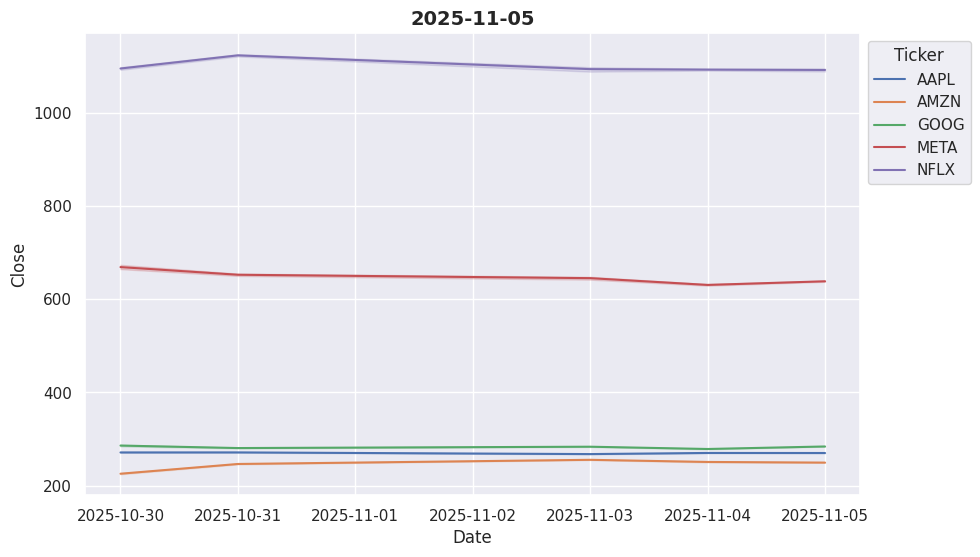

In [25]:
plot_data()

## Problem 3: Script

Create a Python script called faang.py in the root of your repository. Copy the above functions into it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

### Steps:
First I manually created a file called faang.py in the root of my repository. I then created my script. I did this by copying the code to import in my necessary modules (e.g. yfinance, seaborn, etc.), and then by copying the code I wrote to create my two functions: get_data() and plot_data(). At the end of my script, I added two lines of code which called on the two functions. 

Next, I tested whether this script was working by typing "python faang.py" into a command line in my new terminal. This worked. I then returned to the script and added a shebang line. A [shebang](https://realpython.com/python-shebang/) line tells your operating system what interpreter to invoke for the remainder of your script, therefore eliminating the need to specify "python" in the command line. 

Then I needed to change the permissions to allow myself to run the script. I also decided to let others read and execute the script but not modify it. I did this by using the [chmod](https://www.warp.dev/terminus/chmod-755) command, typing "chmod 755 faang.py" in the terminal to make the faang.py file executable for me (and others). I then typed ls -l to get a long list of the items in my directory and could see the permissions for my script as "rwx r-x r-x".

Finally, I tried to run the script again using ./faang.py in the terminal and it worked.

## Problem 4: Automation

Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

The steps for creating a Github Action were followed from the [Quickstart documentation page](https://docs.github.com/en/actions/get-started/quickstart) on GitHub while the faang.yml file is also an adaptation of Ian's class material.

### Explanation of workflow

Line 1 names the Workflow. This is the name that will appear in the Actions section of my Github. Line 3-4 gives the workflow permission to write to my repository. In other words, once it runs faang.py, it will be able to commit and push the generated data and plot files to my repository.

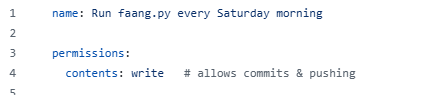

Line 6 to 9 specifies upon what trigger the Workflow should be run. In the case of my Workflow, the event is [Scheduled](https://docs.github.com/en/actions/reference/workflows-and-actions/events-that-trigger-workflows#schedule) to run at a certain time. This evenet runs each Saturday at 8:37am in order to avoid an influx of student activity to the yfinance website. The syntax for the timing of the event uses [Cron](https://crontab.guru/).

In addition to the Scheduled event trigger, I have also added a [workflow dispatch](https://docs.github.com/en/actions/reference/workflows-and-actions/events-that-trigger-workflows#workflow_dispatch) button which enables manual testing of the workflow. This can be seen in line 9.

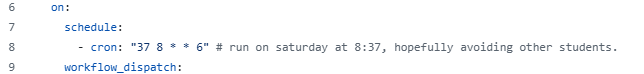

The next section, lines 11-13, specifies what jobs to run. In this case, the workflow runs one job which is called run-faang. According to the [documentation](https://docs.github.com/en/actions/concepts/runners/github-hosted-runners), GitHub provides virtual machines to run workflows. Line 13 indicates that this workflow will use a ubuntu runner.

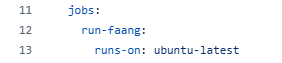

Lines 15-18 specify the first steps involved in the job. Line 16 shows the descriptive name of the step, with line 18 specifying that this step will check out the repository. 

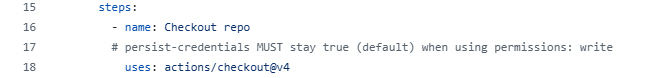

The next step involves setting up the Python environment using [action/setup-python](https://github.com/actions/setup-python). This function allows you to specify which version(s) of Python you want to use or exclude.

For more, see: https://docs.github.com/en/actions/tutorials/build-and-test-code/python

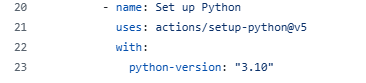

This lets you to install your dependencies and install your requirements. This is particularly import as my program uses several modules and libraries not contained by Python by default such as yfinance and seaborn.

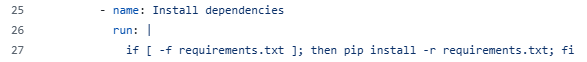

Lines 29-30 tell the workflow that the next step is to run my faang.py program. 

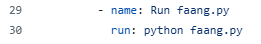

Line 32 names the step involved in the git commit. Line 34 and 35 configure the author details for the commits made by the workflow. 

In line 36, [git add - A](https://git-scm.com/docs/git-add) stages all changes in the repository (i.e. new csv data files or PNG images). 

In line 37, git diff checks for changes. If there have been no changes, no commits are necessary, if there are, it will create a commit along with a descriptive message (i.e. "Automate update from faang.py")

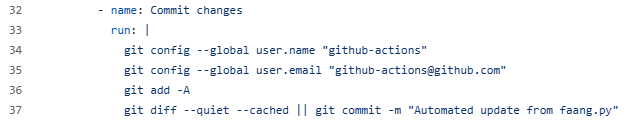

Lastly, the Workflow pushes the changes up to Github repository.

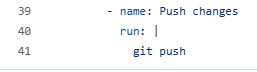